<H2> Generate Bitcoin signals based on RSI/MACD

<h3> Import required libraries

In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from yahoo_historical import Fetcher
from quant_predict import quant_pred


<h3> Download bitcoin price data from 2018-12-1 to 2020-9-9

In [4]:
ticker = 'BTC-USD'
dstart = [2018,12,1]


df = Fetcher(ticker, dstart).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
# df = df[:-1]
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
644,2020-09-05,10512.530273,10581.571289,9946.675781,10169.567383,10169.567383,4.491657e+10
645,2020-09-06,10167.216797,10353.927734,10056.885742,10280.351563,10280.351563,3.707146e+10
646,2020-09-07,10280.998047,10399.153320,9916.493164,10369.563477,10369.563477,3.370310e+10
647,2020-09-08,10369.306641,10414.775391,9945.110352,10131.516602,10131.516602,3.343093e+10
648,2020-09-09,10130.601563,10291.272461,10018.892578,10288.207031,10288.207031,2.847342e+10


<h3> compute trade signals and returns on investment and set the signal source to macd

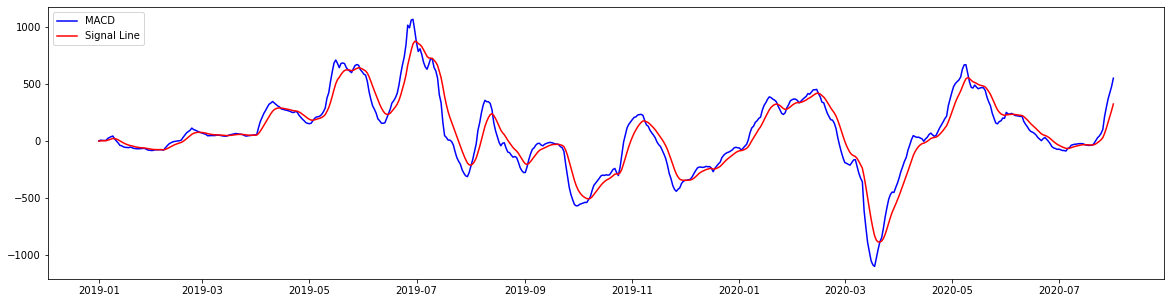

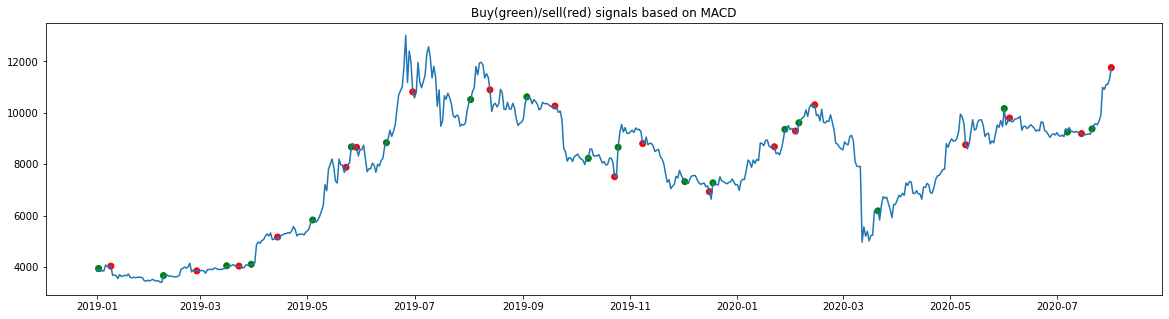

In [8]:
start = '2019-1-1'
end = '2020-8-1'
alg = 'macd'
signals, gl_alg, gl_ref = quant_pred(df,alg, start, end)

<h3> Return (% gains) using the signals

In [11]:
print(round(gl_alg))

323.0


<h3>Return without using the singnals (buy at start, sell at end)

In [12]:
print(round(gl_ref))

206


In [18]:
signals

,Start,End,len,macd_max,chg_max,chg_pct_max,close_start,close_end,gain_loss
0,2019-01-02,2019-01-09,8.0,21.589149,13.769493,inf,3943.409424,4035.296387,2.330140
1,2019-02-08,2019-02-27,20.0,54.487159,17.154063,0.743126,3666.780273,3851.047363,5.025310
2,2019-03-16,2019-03-23,8.0,10.221174,6.824335,0.727751,4048.725830,4035.826416,-0.318604
3,2019-03-30,2019-04-14,16.0,106.826511,47.306602,10.071003,4106.660156,5167.722168,25.837590
4,2019-05-04,2019-05-23,20.0,233.111967,58.569593,1.006690,5831.167480,7881.846680,35.167558
5,2019-05-26,2019-05-29,4.0,33.610579,29.994910,1.674761,8673.215820,8659.487305,-0.158286
6,2019-06-15,2019-06-30,16.0,350.176867,84.695382,9.308688,8838.375000,10817.155273,22.388508
7,2019-08-02,2019-08-13,12.0,244.163332,71.379447,1.277337,10518.174805,10895.830078,3.590502
8,2019-09-03,2019-09-19,17.0,85.316164,55.385578,0.935656,10623.540039,10266.415039,-3.361638
9,2019-10-08,2019-10-23,16.0,82.224921,40.395655,2.978508,8228.783203,7514.671875,-8.678213
